In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Pairplot graf
pd.options.mode.chained_assignment = None #Vypíná hlášení chyb u ekvifrekvenčních intervalů - chybovou hlášku se nedařilo opravit, rozdělení do EF intervalů proběhne bez problému
import pickle
from sklearn.preprocessing import MinMaxScaler

In [117]:
dfphish = pd.read_csv('PhishLabeled.csv', delimiter = ";")
# 1 as Phish
dfphish['Label'] = 1

display(dfphish)

,Nalehani,LukrativniNabidka,ObsahujeHyperlink,ObsahujePrilohu,Gramatika,Vizual,ObsahujeFinance,Label
0,1,0,1,0,0,0,0,1
1,1,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1
4,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...
108,0,0,1,0,0,1,0,1
109,0,0,1,0,0,0,0,1
110,1,0,1,0,0,0,0,1
111,0,0,1,0,0,0,0,1


In [118]:
dfvalid = pd.read_csv('ValidLabeled.csv', delimiter = ";")
# 0 as valid 
dfvalid['Label'] = 0

display(dfvalid)

,Nalehani,LukrativniNabidka,ObsahujeHyperlink,ObsahujePrilohu,Vizual,Gramatika,ObsahujeFinance,Label
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
109,0,0,0,0,0,0,0,0
110,0,0,0,0,1,0,0,0
111,0,0,0,0,0,0,0,0
112,1,0,1,0,0,0,0,0


In [119]:
dfmerged = [dfvalid, dfphish]

df = pd.concat(dfmerged, ignore_index=True)

display(df)

,Nalehani,LukrativniNabidka,ObsahujeHyperlink,ObsahujePrilohu,Vizual,Gramatika,ObsahujeFinance,Label
0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
222,0,0,1,0,1,0,0,1
223,0,0,1,0,0,0,0,1
224,1,0,1,0,0,0,0,1
225,0,0,1,0,0,0,0,1


In [120]:
# PairPlot1 = ["Nalehani", "LukrativniNabidka", "ObsahujeHyperlink", "ObsahujePrilohu", "Vizual", "Gramatika", "ObsahujeFinance"]
PairPlot1 = ["Nalehani", "LukrativniNabidka", "ObsahujeHyperlink", "Label"]
# sns.pairplot(df[PairPlot1], hue="Label")
sns.pairplot(df, hue="Label")

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #pro počítání přesnosti


In [122]:
X = df.drop(["Label"], axis=1)

y = df["Label"]

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.25, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(170, 7) (57, 7) (170,) (57,)


In [193]:
modeldc = DecisionTreeClassifier(random_state=1,max_depth=2, min_samples_leaf=1)
modeldc.fit(X_train, y_train)
y_predict = modeldc.predict(X_test)

accuracy_score(y_test,y_predict)


0.7894736842105263

In [175]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

knn.score(X_test,y_test)


C:\Users\honza\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.7368421052631579

In [181]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix



accuracy_score(y_test,y_predict)



#print("Accuracy:",metrics.accuracy_score(X_train, y_test))


0.7543859649122807

In [127]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modeldc, X_test, y_test)

C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


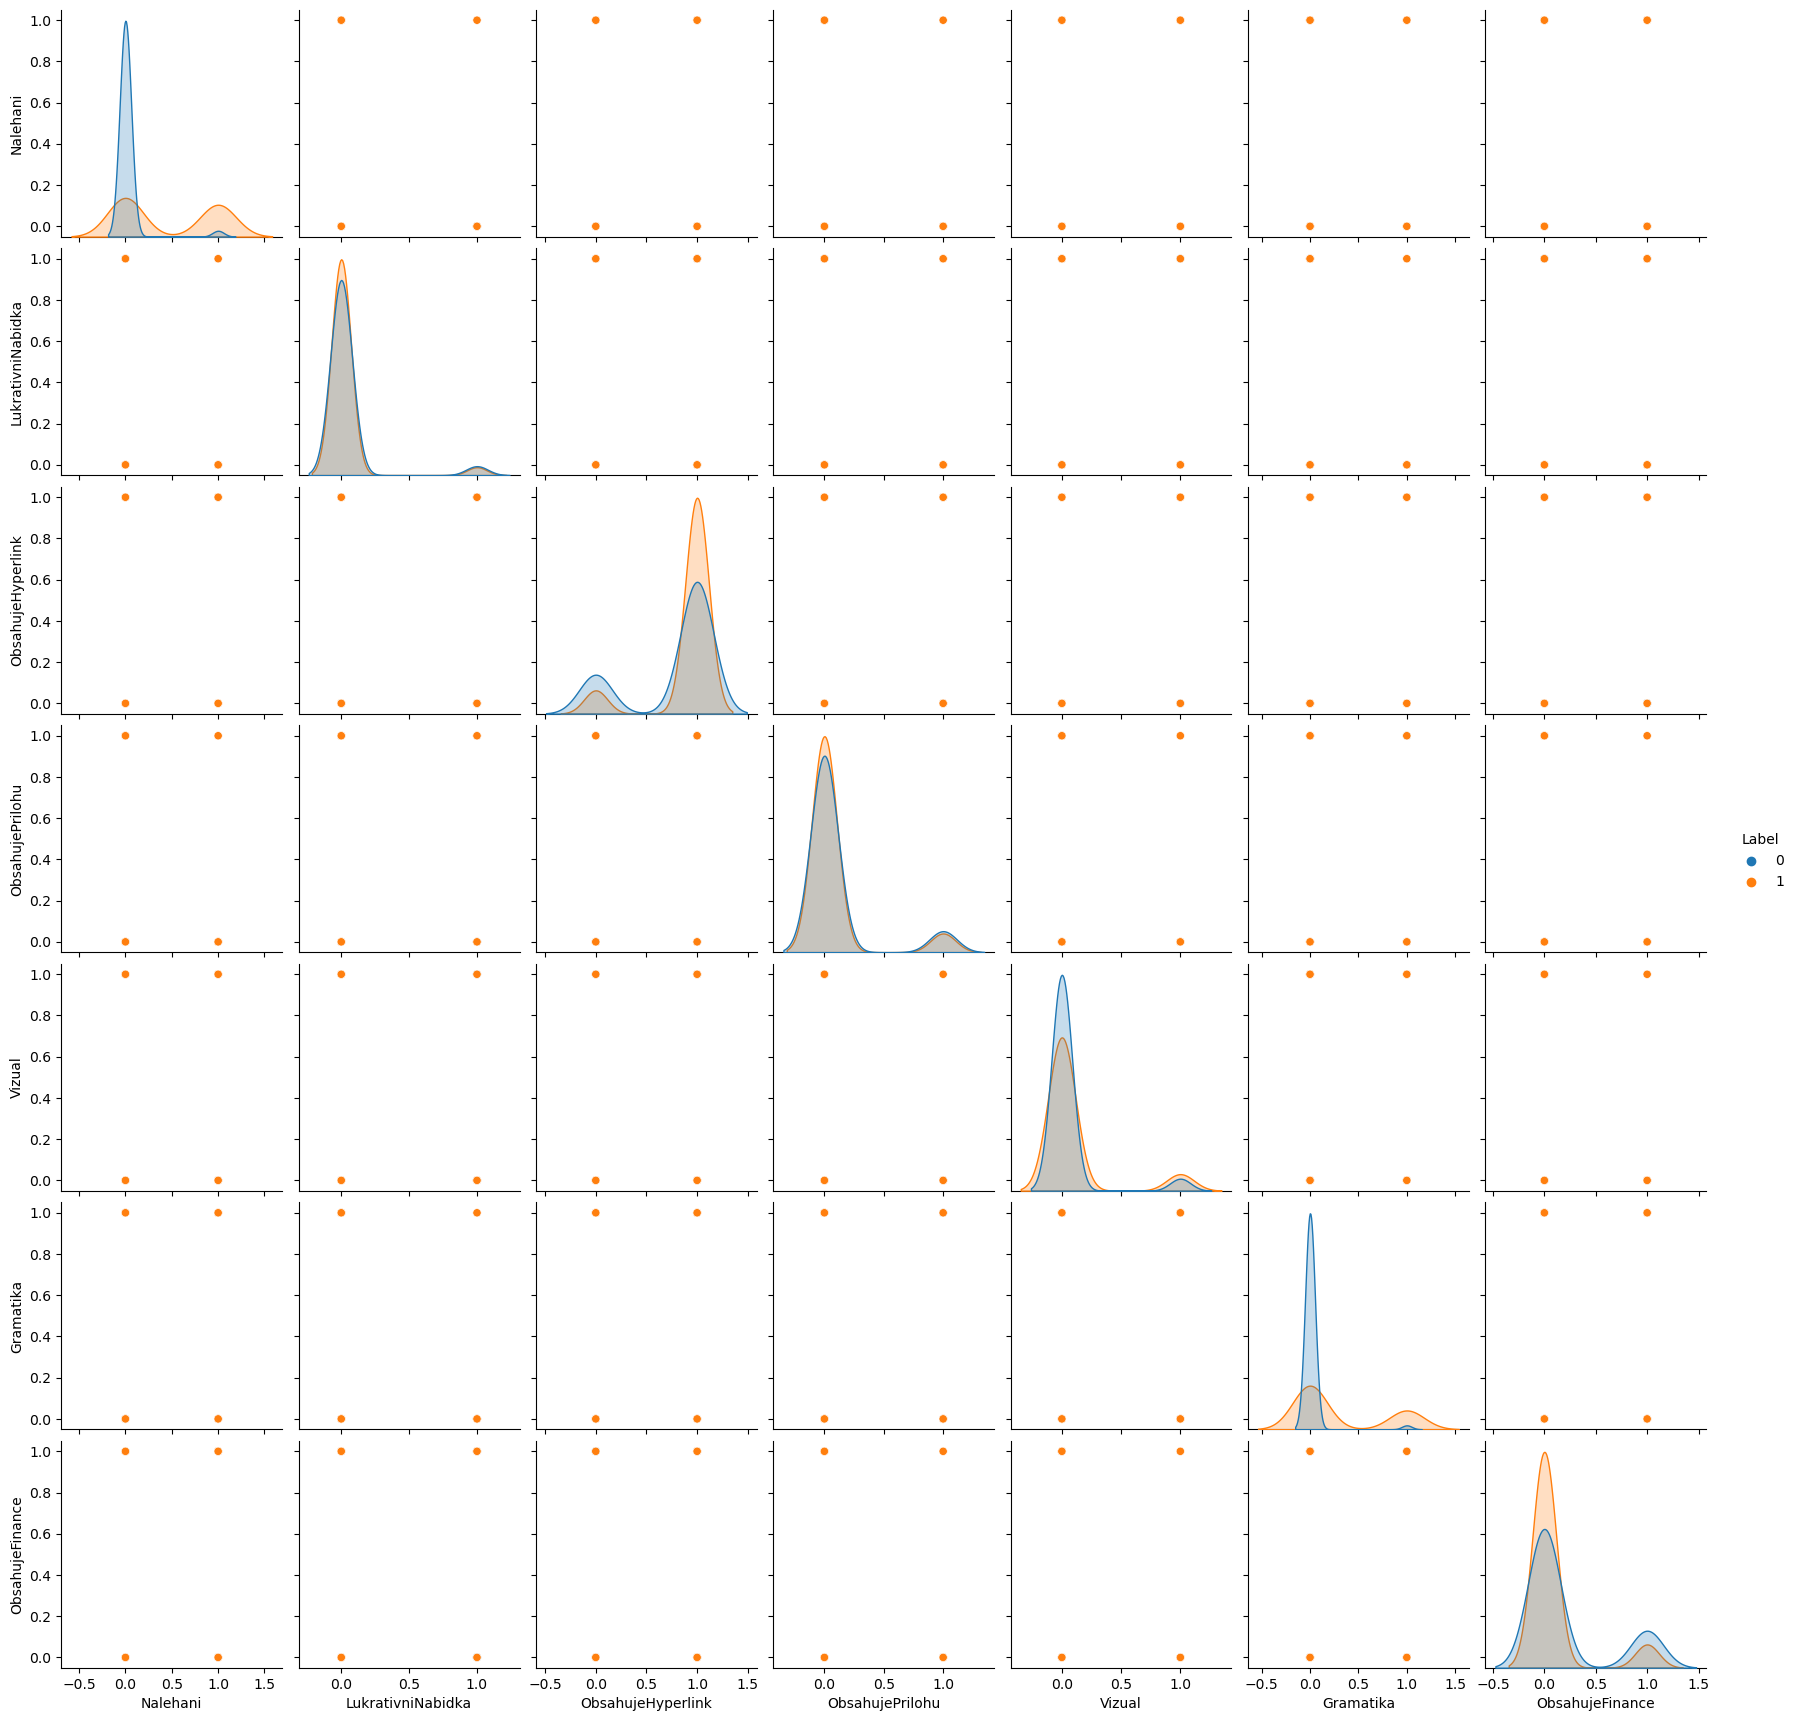

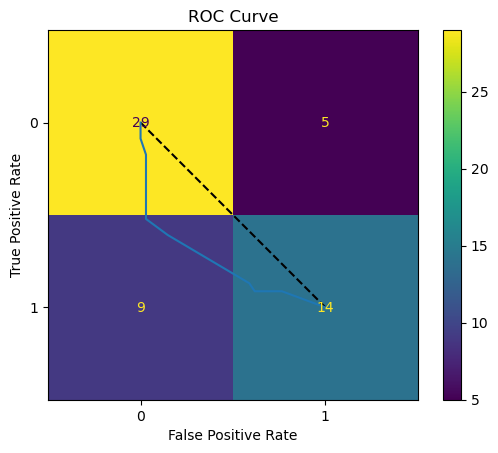

In [128]:
from sklearn.metrics import roc_curve

y_pred_dc = modeldc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dc)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

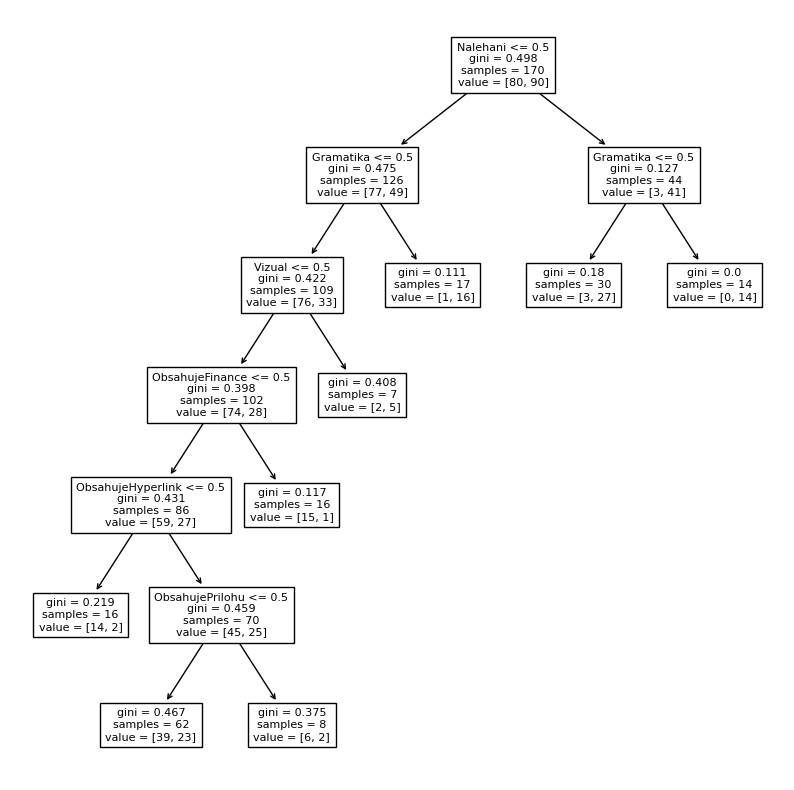

In [129]:
from sklearn import tree

fig, ax = plt.subplots(figsize=(10, 10))

tree.plot_tree(modeldc, fontsize=8, feature_names=["Nalehani", "LukrativniNabidka", "ObsahujeHyperlink", "ObsahujePrilohu", "Vizual", "Gramatika", "ObsahujeFinance"])


plt.show()

In [194]:
text_representation = tree.export_text(modeldc, feature_names=["Nalehani", "LukrativniNabidka", "ObsahujeHyperlink", "ObsahujePrilohu", "Vizual", "Gramatika", "ObsahujeFinance"])
print(text_representation)

|--- Nalehani <= 0.50
|   |--- Gramatika <= 0.50
|   |   |--- class: 0
|   |--- Gramatika >  0.50
|   |   |--- class: 1
|--- Nalehani >  0.50
|   |--- ObsahujeFinance <= 0.50
|   |   |--- class: 1
|   |--- ObsahujeFinance >  0.50
|   |   |--- class: 1



In [195]:
from sklearn.neighbors import KNeighborsClassifier

In [159]:
from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression(solver='liblinear')
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [160]:
from sklearn.model_selection import GridSearchCV

c_space = np.logspace(-5, 8, 15)

param_grid = {'penalty': ['l1', 'l2']}

logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

logreg_cv.fit(X_train, y_train)

logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [161]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

logreg_cv.best_score_


0.776470588235294

In [143]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logreg_cv, X_train, y_train, cv=10)
scores

array([0.94117647, 0.70588235, 0.64705882, 0.82352941, 0.64705882,
       0.76470588, 0.70588235, 0.76470588, 0.82352941, 0.82352941])

In [144]:
logreg_cv.best_estimator_

LogisticRegression(random_state=0, solver='liblinear')

In [145]:
logreg_cv.best_estimator_.coef_

array([[ 2.2489011 ,  0.54820472,  0.63871318,  0.08387899,  0.98143814,
         2.23675203, -1.06030469]])

C:\Users\honza\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


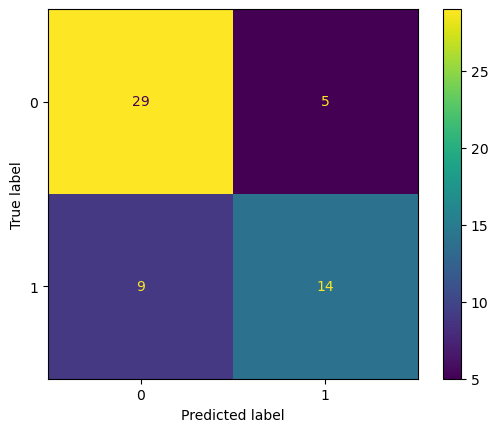

In [146]:
plot_confusion_matrix(logreg_cv, X_test, y_test)
plt.show()

In [162]:
y_pred = logreg_cv.predict(X_test)

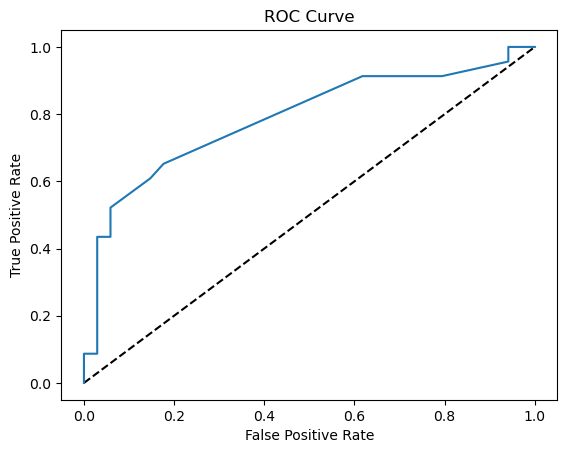

AUC value: 0.7864450127877237


In [196]:
from sklearn.metrics import f1_score

y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print("AUC value:", metrics.auc(fpr, tpr))



In [197]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))


0.6666666666666666
0.7543859649122807
0.7368421052631579
0.6086956521739131


In [29]:
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

# log_model = logreg_cv(C=1)
logreg_cv.fit(X_scaled, y)

pickle.dump(logreg_cv, open("ml_model.sav", "wb"))
pickle.dump(sc, open("scaler.sav", "wb"))

In [ ]:
sc = MinMaxScaler(feature_range=(0, 1))
X_scaled = sc.fit_transform(X)

log_model = LogisticRegression(C=1)
log_model.fit(X_scaled, y)

pickle.dump(log_model, open("ml_model.sav", "wb"))
pickle.dump(sc, open("scaler.sav", "wb"))